# Fucking around with data 
making a slice of the data, 
creating new features, 
making the target label, etc..

In [236]:
from sklearn.preprocessing import MinMaxScaler
import talib
import numpy as np
import os
import kagglehub
import pandas as pd
import random
import matplotlib.pyplot as plt

In [237]:
data_path = kagglehub.dataset_download('sahilchambyal/solana-price-usd')

# List the files inside the downloaded data directory
for dirname, _, filenames in os.walk(data_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/ash/.cache/kagglehub/datasets/sahilchambyal/solana-price-usd/versions/1/SOLUSD_1s_05NOV2024_to15NOV2024.csv
/Users/ash/.cache/kagglehub/datasets/sahilchambyal/solana-price-usd/versions/1/SOLUSD_1s_01NOV2024_to15NOV2024.csv
/Users/ash/.cache/kagglehub/datasets/sahilchambyal/solana-price-usd/versions/1/SOLUSD_1min_20AUG2020_to15NOV2024.csv


In [238]:
data = pd.read_csv(data_path + '/SOLUSD_1min_20AUG2020_to15NOV2024.csv')
# convert to df
df = pd.DataFrame(data)

In [239]:
# Display the first few rows of the data
df.head()

,OpenTime,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberOfTrades,TakerBuyBaseVolume,TakerBuyQuoteVolume,Ignore
0,1597852080000,3.0000,3.0009,2.9893,2.9977,771.96,1597852139999,2315.230586,18,54.51,163.517987,0
1,1597852140000,2.9893,2.9958,2.9800,2.9953,2676.06,1597852199999,7981.488056,23,922.81,2754.110336,0
2,1597852200000,2.9823,2.9929,2.9800,2.9929,430.08,1597852259999,1281.903834,9,12.29,36.782741,0
3,1597852260000,2.9825,3.0046,2.9824,3.0045,601.93,1597852319999,1801.110659,11,340.03,1020.016758,0
4,1597852320000,2.9982,2.9982,2.9980,2.9980,116.81,1597852379999,350.199742,2,0.00,0.000000,0


In [240]:
# Display the last few rows of the data
df.tail()

,OpenTime,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberOfTrades,TakerBuyBaseVolume,TakerBuyQuoteVolume,Ignore
2228995,1731591780000,215.27,216.20,215.27,215.76,6502.215,1731591839999,1.403323e+06,3937,4382.881,9.456026e+05,0
2228996,1731591840000,215.76,215.84,215.52,215.82,3084.711,1731591899999,6.652716e+05,2952,1711.371,3.690536e+05,0
2228997,1731591900000,215.82,216.09,215.63,215.63,6420.050,1731591959999,1.386333e+06,4350,3542.590,7.649240e+05,0
2228998,1731591960000,215.63,215.63,215.14,215.30,17499.586,1731592019999,3.769764e+06,4943,4593.328,9.888689e+05,0
2228999,1731592020000,215.30,215.44,215.02,215.08,7686.178,1731592079999,1.654606e+06,3867,5455.040,1.174334e+06,0


In [241]:
# Display the shape of the data
df.shape

(2229000, 12)

In [242]:
# Display the data types of the columns
df.dtypes

OpenTime                 int64
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                 float64
CloseTime                int64
QuoteAssetVolume       float64
NumberOfTrades           int64
TakerBuyBaseVolume     float64
TakerBuyQuoteVolume    float64
Ignore                   int64
dtype: object

In [243]:
# Display summary statistics of the data
df.describe()

,OpenTime,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberOfTrades,TakerBuyBaseVolume,TakerBuyQuoteVolume,Ignore
count,2.229000e+06,2.229000e+06,2.229000e+06,2.229000e+06,2.229000e+06,2.229000e+06,2.229000e+06,2.229000e+06,2.229000e+06,2.229000e+06,2.229000e+06,2229000.0
mean,1.664722e+12,6.960446e+01,6.967249e+01,6.953562e+01,6.960455e+01,3.146914e+03,1.664722e+12,2.138803e+05,3.610606e+02,1.565510e+03,1.069291e+05,0.0
std,3.860745e+10,6.347687e+01,6.353536e+01,6.341742e+01,6.347693e+01,6.183527e+03,3.860745e+10,4.743069e+05,7.724076e+02,3.349919e+03,2.535927e+05,0.0
min,1.597852e+12,1.079400e+00,1.101500e+00,1.030100e+00,1.059200e+00,0.000000e+00,1.597852e+12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.631287e+12,2.053000e+01,2.054000e+01,2.052000e+01,2.053000e+01,6.320300e+02,1.631287e+12,1.829997e+04,4.900000e+01,2.483800e+02,7.363033e+03,0.0
50%,1.664722e+12,3.694000e+01,3.699000e+01,3.689000e+01,3.694000e+01,1.466380e+03,1.664722e+12,7.390459e+04,1.440000e+02,6.699090e+02,3.372677e+04,0.0
75%,1.698157e+12,1.307700e+02,1.309000e+02,1.306400e+02,1.307700e+02,3.333838e+03,1.698157e+12,2.197406e+05,3.720000e+02,1.632433e+03,1.058794e+05,0.0
max,1.731592e+12,2.597900e+02,2.599000e+02,2.596000e+02,2.598000e+02,6.430630e+05,1.731592e+12,3.074767e+07,4.548100e+04,3.472126e+05,2.377905e+07,0.0


In [244]:
# Display basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229000 entries, 0 to 2228999
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   OpenTime             int64  
 1   Open                 float64
 2   High                 float64
 3   Low                  float64
 4   Close                float64
 5   Volume               float64
 6   CloseTime            int64  
 7   QuoteAssetVolume     float64
 8   NumberOfTrades       int64  
 9   TakerBuyBaseVolume   float64
 10  TakerBuyQuoteVolume  float64
 11  Ignore               int64  
dtypes: float64(8), int64(4)
memory usage: 204.1 MB


In [245]:
# convert the OpenTime and CloseTime column to datetime
df['OpenTime'] = pd.to_datetime(df['OpenTime'], unit='ms')
df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='ms')

In [246]:
#head
df.head()

,OpenTime,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberOfTrades,TakerBuyBaseVolume,TakerBuyQuoteVolume,Ignore
0,2020-08-19 15:48:00,3.0000,3.0009,2.9893,2.9977,771.96,2020-08-19 15:48:59.999,2315.230586,18,54.51,163.517987,0
1,2020-08-19 15:49:00,2.9893,2.9958,2.9800,2.9953,2676.06,2020-08-19 15:49:59.999,7981.488056,23,922.81,2754.110336,0
2,2020-08-19 15:50:00,2.9823,2.9929,2.9800,2.9929,430.08,2020-08-19 15:50:59.999,1281.903834,9,12.29,36.782741,0
3,2020-08-19 15:51:00,2.9825,3.0046,2.9824,3.0045,601.93,2020-08-19 15:51:59.999,1801.110659,11,340.03,1020.016758,0
4,2020-08-19 15:52:00,2.9982,2.9982,2.9980,2.9980,116.81,2020-08-19 15:52:59.999,350.199742,2,0.00,0.000000,0


CloseTime and ignore are redundent

In [247]:
# drop CloseTime column
df = df.drop(columns=['CloseTime'])
# drop ingore column
df = df.drop(columns=['Ignore'])

# Creating a sample df 

In [281]:
# a random day from the data
# Convert OpenTime to datetime if not already done
df['OpenTime'] = pd.to_datetime(df['OpenTime'])

# Get a list of unique dates
unique_dates = df['OpenTime'].dt.date.unique()

# Select a random date
random_date = random.choice(unique_dates)

# Slice the data for the selected random date
random_day_data = df[df['OpenTime'].dt.date == random_date]

# Display the sliced data
random_day_data.head()

,OpenTime,Open,High,Low,Close,Volume,QuoteAssetVolume,NumberOfTrades,TakerBuyBaseVolume,TakerBuyQuoteVolume
49452,2020-09-23 00:00:00,2.9184,2.9428,2.9184,2.9413,3732.39,10929.696076,44,3732.39,10929.696076
49453,2020-09-23 00:01:00,2.9413,2.9413,2.9413,2.9413,0.00,0.000000,0,0.00,0.000000
49454,2020-09-23 00:02:00,2.9320,2.9491,2.9261,2.9489,1851.70,5440.639028,45,1438.41,4230.665605
49455,2020-09-23 00:03:00,2.9500,2.9509,2.9434,2.9508,978.50,2885.757381,14,833.58,2459.195900
49456,2020-09-23 00:04:00,2.9513,2.9514,2.9513,2.9514,208.77,616.157914,5,208.77,616.157914


In [282]:
# Keep the last few rows of the data to maintain the sequence
# slice_df = df.tail(1440)  # Adjust the number of rows as needed
slice_df = random_day_data
slice_df.head()

,OpenTime,Open,High,Low,Close,Volume,QuoteAssetVolume,NumberOfTrades,TakerBuyBaseVolume,TakerBuyQuoteVolume
49452,2020-09-23 00:00:00,2.9184,2.9428,2.9184,2.9413,3732.39,10929.696076,44,3732.39,10929.696076
49453,2020-09-23 00:01:00,2.9413,2.9413,2.9413,2.9413,0.00,0.000000,0,0.00,0.000000
49454,2020-09-23 00:02:00,2.9320,2.9491,2.9261,2.9489,1851.70,5440.639028,45,1438.41,4230.665605
49455,2020-09-23 00:03:00,2.9500,2.9509,2.9434,2.9508,978.50,2885.757381,14,833.58,2459.195900
49456,2020-09-23 00:04:00,2.9513,2.9514,2.9513,2.9514,208.77,616.157914,5,208.77,616.157914


In [283]:
# Display the shape of the sample data
slice_df.shape

(1440, 10)

In [284]:
# describe the sample data
slice_df.describe()

,OpenTime,Open,High,Low,Close,Volume,QuoteAssetVolume,NumberOfTrades,TakerBuyBaseVolume,TakerBuyQuoteVolume
count,1440,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,2020-09-23 11:59:29.999999744,2.887277,2.891868,2.882966,2.887241,1918.160389,5541.989929,23.938194,975.748556,2829.890895
min,2020-09-23 00:00:00,2.710600,2.716500,2.700100,2.711700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020-09-23 05:59:45,2.827375,2.830700,2.823600,2.827975,191.242500,554.377589,5.000000,12.687500,36.669695
50%,2020-09-23 11:59:30,2.882000,2.886500,2.879550,2.882450,781.595000,2234.016324,12.000000,208.200000,603.573306
75%,2020-09-23 17:59:15,2.945000,2.949225,2.942200,2.946125,2063.465000,5970.655659,27.000000,939.430000,2723.110649
max,2020-09-23 23:59:00,3.071800,3.090000,3.052500,3.078100,62946.120000,187277.163748,797.000000,26405.600000,78635.470471
std,NaN,0.072923,0.072843,0.072707,0.073057,3609.665820,10538.469646,42.549105,2178.770202,6368.111477


In [285]:
# save the sample data to a new csv file
slice_df.to_csv('solana_price_usd_sample.csv', index=False)

/var/folders/93/p0s3sy4d5hlgxwt8fpdw08sh0000gn/T/ipykernel_54801/46540485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slice_df['OpenTime'] = pd.to_datetime(slice_df['OpenTime'], unit='ms')


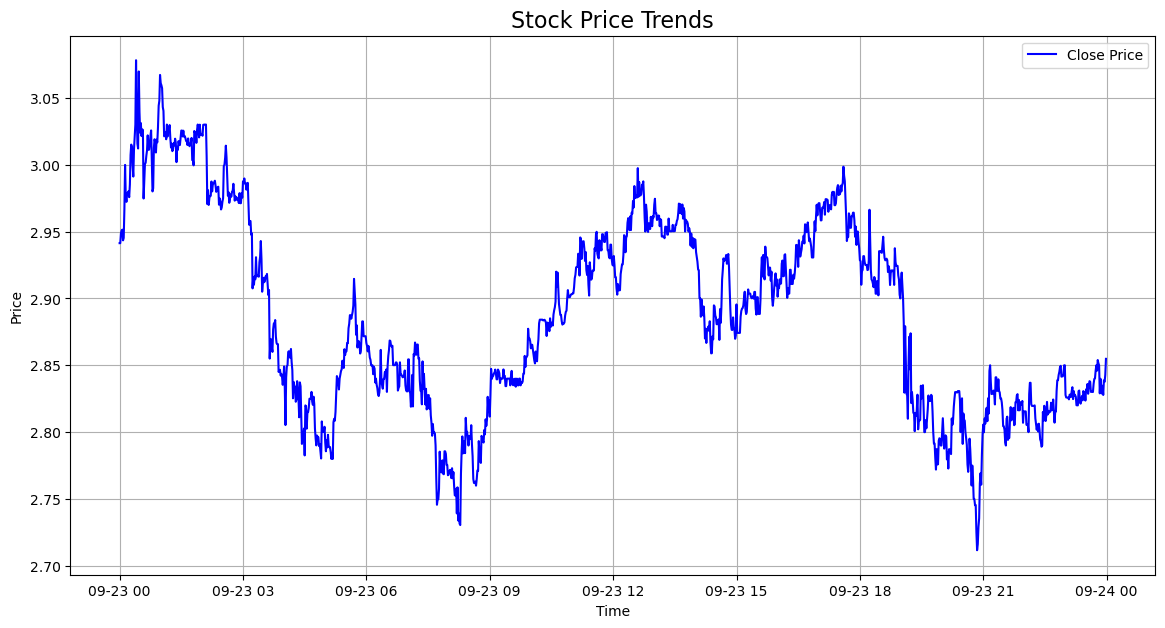

In [286]:
import matplotlib.pyplot as plt

# Convert OpenTime to datetime
slice_df['OpenTime'] = pd.to_datetime(slice_df['OpenTime'], unit='ms')

# Line chart for Close prices
plt.figure(figsize=(14, 7))
plt.plot(slice_df['OpenTime'], slice_df['Close'], label='Close Price', color='blue')
plt.title('Stock Price Trends', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


## Creating target and new derivative features

In [287]:
def create_target_labels(df, profit_threshold=0.005, lookforward_window=60):
    """
    Create target labels based on maximum future profitability within the lookforward window.
    Prioritizes higher profitability over spacing between trades.
    Handles buy and sell signals separately.

    Parameters:
    df: DataFrame with OHLCV data
    profit_threshold: Minimum price movement to consider for a trade (default 0.3%)
    lookforward_window: How far to look ahead for price movement

    Returns:
    Updated DataFrame with 'target' column.
    """
    df = df.copy()

    # Ensure Close prices are float
    df['Close'] = df['Close'].astype(float)

    # Calculate future returns within the lookforward window
    future_returns = []
    for i in range(1, lookforward_window + 1):
        future_return = df['Close'].shift(-i) / df['Close'] - 1
        future_returns.append(future_return)

    # Combine future returns into a DataFrame for easier processing
    future_returns_df = pd.concat(future_returns, axis=1)
    future_returns_df.columns = [f'return_{i}' for i in range(1, lookforward_window + 1)]

    # Calculate maximum and minimum returns
    df['max_return'] = future_returns_df.max(axis=1)
    df['min_return'] = future_returns_df.min(axis=1)

    # Initialize target column with zeros
    df['target'] = 0

    # Assign buy (1) signals based on maximum return
    df.loc[df['max_return'] > profit_threshold, 'target'] = 1

    # Assign sell (-1) signals based on minimum return
    df.loc[df['min_return'] < -profit_threshold, 'target'] = -1

    # Resolve conflicts for buy signals
    last_buy_signal_idx = None
    for i in range(len(df)):
        if df['target'].iloc[i] == 1:
            # Check for overlapping buy signals
            if last_buy_signal_idx is not None and i - last_buy_signal_idx < lookforward_window:
                # Compare current buy signal with last buy signal
                if df['max_return'].iloc[i] > df['max_return'].iloc[last_buy_signal_idx]:
                    # Current buy signal is better, remove previous
                    df.iloc[last_buy_signal_idx, df.columns.get_loc('target')] = 0
                    last_buy_signal_idx = i
                else:
                    # Previous buy signal is better, remove current
                    df.iloc[i, df.columns.get_loc('target')] = 0
            else:
                last_buy_signal_idx = i

    # Resolve conflicts for sell signals
    last_sell_signal_idx = None
    for i in range(len(df)):
        if df['target'].iloc[i] == -1:
            # Check for overlapping sell signals
            if last_sell_signal_idx is not None and i - last_sell_signal_idx < lookforward_window:
                # Compare current sell signal with last sell signal
                if df['min_return'].iloc[i] < df['min_return'].iloc[last_sell_signal_idx]:
                    # Current sell signal is better (more negative min_return), remove previous
                    df.iloc[last_sell_signal_idx, df.columns.get_loc('target')] = 0
                    last_sell_signal_idx = i
                else:
                    # Previous sell signal is better, remove current
                    df.iloc[i, df.columns.get_loc('target')] = 0
            else:
                last_sell_signal_idx = i

    return df


In [288]:
def add_calendar_features(df):
    """
    Adds calendar and time-based features to the DataFrame:
    - Hour and minute (cyclical encoding)
    - Day of the week (cyclical encoding)
    - Month (cyclical encoding)
    - Holiday indicator
    - Weekend indicator

    Parameters:
    df: DataFrame with at least an 'OpenTime' column in datetime format.

    Returns:
    df: DataFrame with new calendar features added.
    """
    df = df.copy()

    # Ensure 'OpenTime' is in datetime format
    df['OpenTime'] = pd.to_datetime(df['OpenTime'])

    # Extract hour and minute
    df['hour'] = df['OpenTime'].dt.hour
    df['minute'] = df['OpenTime'].dt.minute

    # Cyclical encoding for hour
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

    # Cyclical encoding for minute
    df['minute_sin'] = np.sin(2 * np.pi * df['minute'] / 60)
    df['minute_cos'] = np.cos(2 * np.pi * df['minute'] / 60)

    # Extract day of week and month
    df['day_of_week'] = df['OpenTime'].dt.dayofweek  # Monday=0, Sunday=6
    df['month'] = df['OpenTime'].dt.month

    # Cyclical encoding for day of week
    df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

    # Cyclical encoding for month
    df['month_sin'] = np.sin(2 * np.pi * (df['month'] - 1) / 12)
    df['month_cos'] = np.cos(2 * np.pi * (df['month'] - 1) / 12)

    # Holiday indicator
    import holidays
    us_holidays = holidays.US()
    df['is_holiday'] = df['OpenTime'].dt.date.apply(lambda x: 1 if x in us_holidays else 0)

    # Weekend indicator
    df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

    return df


In [289]:
def create_features(df, windows=[5, 15, 30, 60]):
    """
    Create features for ML model.

    Parameters:
    df: DataFrame with OHLCV data.
    windows: List of lookback windows for different features.

    Returns:
    df: DataFrame with features added.
    features: List of feature column names.
    """
    df = df.copy()

    # Ensure numeric types
    price_cols = ['Open', 'High', 'Low', 'Close']
    df[price_cols + ['Volume']] = df[price_cols + ['Volume']].astype(float)

    features = []

    # 1. Price-based features (existing code)
    for window in windows:
        # Moving averages
        df[f'sma_{window}'] = df['Close'].rolling(window=window).mean()
        df[f'ema_{window}'] = df['Close'].ewm(span=window).mean()

        # Price relative to moving averages
        df[f'close_to_sma_{window}'] = df['Close'] / df[f'sma_{window}']

        # Volatility
        df[f'volatility_{window}'] = df['Close'].rolling(window=window).std()

        # Price momentum
        df[f'momentum_{window}'] = df['Close'] / df['Close'].shift(window)

        features.extend([f'sma_{window}', f'ema_{window}', f'close_to_sma_{window}',
                         f'volatility_{window}', f'momentum_{window}'])

    # 2. Technical indicators (existing code)
    # RSI
    df['rsi'] = talib.RSI(df['Close'].values, timeperiod=14)

    # MACD
    df['macd'], df['macd_signal'], df['macd_hist'] = talib.MACD(
        df['Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)

    # Bollinger Bands
    df['bb_upper'], df['bb_middle'], df['bb_lower'] = talib.BBANDS(
        df['Close'].values, timeperiod=20)
    df['bb_width'] = (df['bb_upper'] - df['bb_lower']) / df['bb_middle']

    # Average True Range
    df['atr'] = talib.ATR(df['High'].values, df['Low'].values,
                          df['Close'].values, timeperiod=14)

    features.extend(['rsi', 'macd', 'macd_signal', 'macd_hist',
                     'bb_width', 'atr'])

    # 3. Volume-based features (existing code)
    for window in windows:
        df[f'volume_sma_{window}'] = df['Volume'].rolling(window=window).mean()
        df[f'volume_ratio_{window}'] = df['Volume'] / df[f'volume_sma_{window}']

        features.extend([f'volume_sma_{window}', f'volume_ratio_{window}'])

    # 4. Price pattern features (existing code)
    df['high_low_ratio'] = df['High'] / df['Low']
    df['close_position'] = (df['Close'] - df['Low']) / (df['High'] - df['Low'])

    features.extend(['high_low_ratio', 'close_position'])

    # 5. Calendar features (new function)
    df = add_calendar_features(df)

    features.extend([
        'hour_sin', 'hour_cos', 'minute_sin', 'minute_cos',
        'day_of_week_sin', 'day_of_week_cos',
        'month_sin', 'month_cos',
        'is_holiday', 'is_weekend'
    ])

    # Drop rows with NaN values
    df = df.dropna()

    return df, features


In [290]:
def prepare_ml_data(df, lookforward_window=30, profit_threshold=0.003):
    """
    Prepare data for machine learning model.

    Parameters:
    df: DataFrame with OHLCV data.
    lookforward_window: How far to look ahead for price movement.
    profit_threshold: Minimum price movement to consider for a trade.

    Returns:
    X: Feature matrix.
    y: Target vector.
    feature_columns: List of feature column names.
    scaler: Fitted MinMaxScaler object.
    df: DataFrame with features and target.
    """
    # Create target labels
    df = create_target_labels(df, profit_threshold, lookforward_window)

    # Create features
    df, feature_columns = create_features(df)

    # Normalize features
    scaler = MinMaxScaler()
    df[feature_columns] = scaler.fit_transform(df[feature_columns])

    # Prepare final datasets
    X = df[feature_columns]
    y = df['target']

    return X, y, feature_columns, scaler, df

An example using the slice of the created features and target label

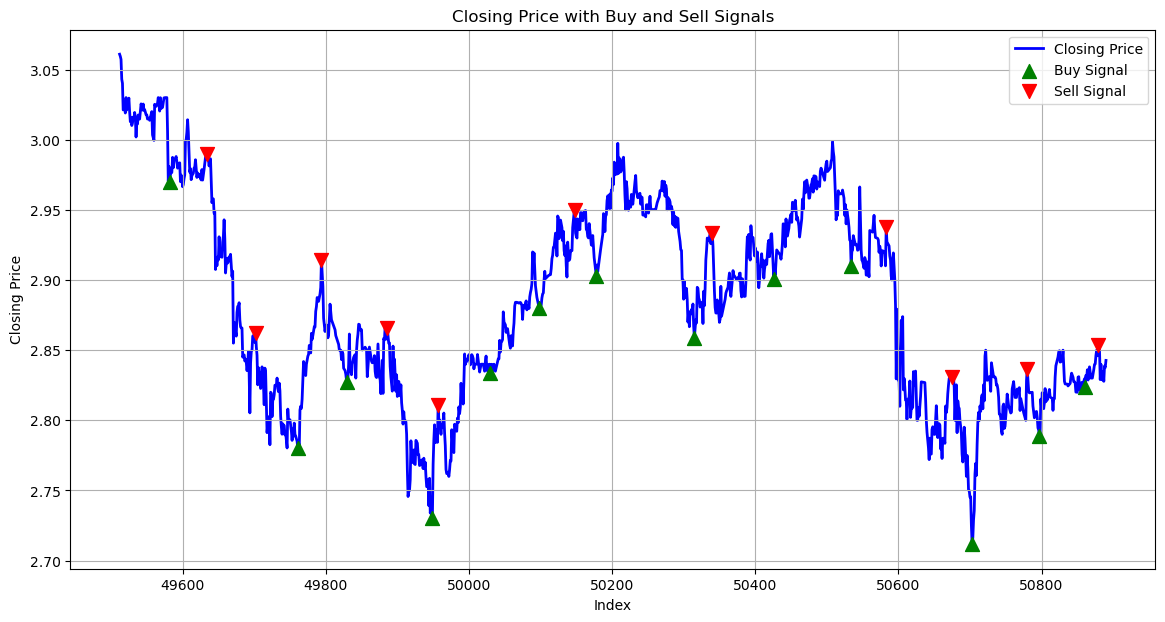

In [295]:
# Call the prepare_ml_data function
X, y, feature_columns, scaler, processed_df = prepare_ml_data(slice_df, lookforward_window=60, profit_threshold=0.005)

# Plot the closing price
plt.figure(figsize=(14, 7))
plt.plot(processed_df['Close'], label='Closing Price', color='blue', linewidth=2, zorder=1)

# Plot buy signals (above the price line)
buy_signals = processed_df[processed_df['target'] == 1]
plt.scatter(buy_signals.index, buy_signals['Close'],  # Keep at the actual Close price
            label='Buy Signal', color='green', marker='^', s=100, zorder=2)

# Plot sell signals (above the price line)
sell_signals = processed_df[processed_df['target'] == -1]
plt.scatter(sell_signals.index, sell_signals['Close'],  # Keep at the actual Close price
            label='Sell Signal', color='red', marker='v', s=100, zorder=2)

# Add labels and legend
plt.title('Closing Price with Buy and Sell Signals')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()
plt.show()


In [296]:
processed_df.head()

,OpenTime,Open,High,Low,Close,Volume,QuoteAssetVolume,NumberOfTrades,TakerBuyBaseVolume,TakerBuyQuoteVolume,...,minute_sin,minute_cos,day_of_week,month,day_of_week_sin,day_of_week_cos,month_sin,month_cos,is_holiday,is_weekend
49512,2020-09-23 01:00:00,3.0567,3.0669,3.0473,3.0609,3658.87,11181.214893,83,2284.30,6984.800856,...,0.500000,1.000000,2,9,0.0,0.0,0.0,0.0,0.0,0.0
49513,2020-09-23 01:01:00,3.0617,3.0622,3.0508,3.0594,648.20,1983.356441,23,365.46,1118.367723,...,0.552264,0.997261,2,9,0.0,0.0,0.0,0.0,0.0,0.0
49514,2020-09-23 01:02:00,3.0598,3.0598,3.0525,3.0572,766.15,2341.792378,22,134.90,412.604199,...,0.603956,0.989074,2,9,0.0,0.0,0.0,0.0,0.0,0.0
49515,2020-09-23 01:03:00,3.0577,3.0622,3.0430,3.0431,9010.34,27495.801066,74,3049.48,9301.122755,...,0.654508,0.975528,2,9,0.0,0.0,0.0,0.0,0.0,0.0
49516,2020-09-23 01:04:00,3.0428,3.0492,3.0400,3.0402,1663.54,5060.013052,26,1368.49,4162.552671,...,0.703368,0.956773,2,9,0.0,0.0,0.0,0.0,0.0,0.0


In [297]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1189 entries, 49512 to 50890
Data columns (total 66 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   OpenTime             1189 non-null   datetime64[ns]
 1   Open                 1189 non-null   float64       
 2   High                 1189 non-null   float64       
 3   Low                  1189 non-null   float64       
 4   Close                1189 non-null   float64       
 5   Volume               1189 non-null   float64       
 6   QuoteAssetVolume     1189 non-null   float64       
 7   NumberOfTrades       1189 non-null   int64         
 8   TakerBuyBaseVolume   1189 non-null   float64       
 9   TakerBuyQuoteVolume  1189 non-null   float64       
 10  max_return           1189 non-null   float64       
 11  min_return           1189 non-null   float64       
 12  target               1189 non-null   int64         
 13  sma_5                1189 non-nul

In [298]:
processed_df['target'].describe()

count    1189.000000
mean        0.001682
std         0.142124
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: target, dtype: float64

In [299]:
print(processed_df[['OpenTime', 'hour', 'hour_sin', 'hour_cos', 'day_of_week', 'day_of_week_sin', 'day_of_week_cos', 'month', 'month_sin', 'month_cos', 'is_holiday', 'is_weekend']].head())

                 OpenTime  hour  hour_sin  hour_cos  day_of_week  \
49512 2020-09-23 01:00:00     1   0.62941       1.0            2   
49513 2020-09-23 01:01:00     1   0.62941       1.0            2   
49514 2020-09-23 01:02:00     1   0.62941       1.0            2   
49515 2020-09-23 01:03:00     1   0.62941       1.0            2   
49516 2020-09-23 01:04:00     1   0.62941       1.0            2   

       day_of_week_sin  day_of_week_cos  month  month_sin  month_cos  \
49512              0.0              0.0      9        0.0        0.0   
49513              0.0              0.0      9        0.0        0.0   
49514              0.0              0.0      9        0.0        0.0   
49515              0.0              0.0      9        0.0        0.0   
49516              0.0              0.0      9        0.0        0.0   

       is_holiday  is_weekend  
49512         0.0         0.0  
49513         0.0         0.0  
49514         0.0         0.0  
49515         0.0         0.0 

In [ ]:
X, y, feature_columns, scaler, processed_df = prepare_ml_data(df, lookforward_window=60, profit_threshold=0.005)

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
target_counts = df['target'].value_counts()
print(target_counts)


In [ ]:
import seaborn as sns
sns.countplot(x='target', data=df)

In [ ]:
corr_matrix = df[feature_columns].corr()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.show()

In [ ]:
df[feature_columns].hist(bins=50, figsize=(20, 15))
plt.show()